## Part a and b) 

Let’s start with the given image. If the starting number is 1, then we would say S = 1. Assuming we are to dial a 4-digit number starting from 1, Ω(1) = 1 for any number since we can start from any number. Getting to 2nd digit, we could say from 1 we can either go to 4 or 2. Now let’s break the digits. If we can go to 2 possible positions from 1, the Ω(1,2) = 2
With 2 digits covered, we have 2 more left. Building on the same logic
Ω(2,2) = 3. Or Ω(4,2) = 3. Both paths lead show the same Omega value

If we go with 5 as the next digit, the options would be:
Ω(5,2) = 4. (possible next digit is 2, 4, 8 or 6)

This is the highest value we can get from the current arrangements of numbers. Beyond this point, any next digit we pick will have an Omega of 3 at-least. If we choose 8 as next hop from 5, we will get Ω(8,2) = 4. Adding all these up will give us the Omega value. 

Ω(1,4) = 2+3+4+4 = 13

Using the matrix which shows the possibility of a path between 2 numbers. 


In [22]:
import numpy as np
a = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]
])

print(a.shape)

(10, 10)


In [17]:
n = np.array([
    [1],
    [1],
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1]])#.reshape(1,10)
print(n.shape)

(10, 1)


In [22]:
#1 Ω(N) = A × Ω(1) which means for 2 digit numbers
m2 = np.dot(a,n)
print(m2)

[[1]
 [2]
 [3]
 [2]
 [3]
 [4]
 [3]
 [2]
 [4]
 [2]]


In [23]:
#Ω(N) = A × Ω(2)+ #1
m3=np.dot(a,m2)
print(m3)

[[ 4]
 [ 6]
 [ 8]
 [ 6]
 [ 8]
 [13]
 [ 8]
 [ 7]
 [ 9]
 [ 7]]


In [25]:
m4 = np.dot(a,m3)
print(m4)

[[ 9]
 [16]
 [25]
 [16]
 [26]
 [33]
 [26]
 [17]
 [31]
 [17]]


## Part c) 
Lets transpose A and try to compare the original and the transpose

In [42]:
def compareMatrices(A,B):
    """
    This function takes 2 matrices and compares them element wise to determine equality
    """
    ##If the shape of the matrices is different there is no need to compare
    #they are already unequal
    if (A.shape == Atrans.shape):
        print("Matrices have same shape")
        if(A.all()==B.all()):
            return True
        else:
            return False
    else:
        print("cant compare matrices")
        return False
    

In [44]:
A = np.matrix(a)
Atrans = A.T
are_matrices_same = compareMatrices(A, Atrans)
print("Comparing similarity of matrices shows ",are_matrices_same)

Matrices have same shape
Comparing similarity of matrices shows  True


### As to whether did I expect the matrix and its transpose to be equal, the answer is yes, the reason is, if there is a path from 0->8, then there is a path from 8->0 as well. This is a non-directional problem. Hence the matrix and its transpose would be identical


## Part d) - Defining Dialer_Problem Method

In [ ]:
import numpy as np
def Dialer_Problem(s,n):
    """
    A function to find number of unique n-digit paths on the dial pad for a given number S
    """
    dial_routes = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]])
    #Each point can is a digit in itself so if we have to dial 1 digit number, for all numbers 1 path exists
    initial_number=np.array([
    [1],
    [1],
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1]])
    
    #implementing A**(n-1). Since we multiplied with A already, in the for loop we will 
    #only loop for n-2 times. 
    paths=np.dot(dial_routes,initial_number)
    for i in range(n-2):
        paths=np.dot(dial_routes,paths)
    res = paths.T[0].tolist()[s]
    return(res)

In [98]:
import time
start_time = time.time()
routes = Dialer_Problem(5,10)
end_time = time.time()
print (routes)
print("--- %s seconds ---" % (end_time - start_time))

18713
--- 0.00012993812561035156 seconds ---


## part e) Rewrite without numpy package

In [96]:
def matmul(A,B):
    """
    A function which computes matrix multiplication of the first 
    and second inputs. Inputs should be list-like.
    """
    
    if len(A[0])==len(B):
        R=[[sum(x*y for x,y in zip(A_row,B_col)) for B_col in zip(*B)] for A_row in A]
        return R
    else: 
        print('Matrix dimensions do not match')
        
        

def Dialer_Problem_no_numpy(s,n):
    """
    A function to find number of unique n-digit paths on the dial pad for a given number S
    """
    dial_routes = [
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]]
    #Each point can is a digit in itself so if we have to dial 1 digit number, for all numbers 1 path exists
    initial_number=[
    [1],
    [1],
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1]]
    
    #implementing A**(n-1). Since we multiplied with A already, in the for loop we will 
    #only loop for n-2 times. 
    paths=matmul(dial_routes,initial_number)
    for i in range(n-2):
        paths=matmul(dial_routes,paths)  
    res = paths[s][0]
    return(res)

In [99]:
import time
start_time = time.time()
routes = Dialer_Problem_no_numpy(5,10)
end_time = time.time()
print (routes)
print("--- %s seconds ---" % (end_time - start_time))

18713
--- 0.0006110668182373047 seconds ---


## part f) Lets plot the performance with and without numpy

n1 [0, 100, 200, 300, 400, 500, 600, 700, 800, 900]
n2 [4.8160552978515625e-05, 0.0007989406585693359, 0.0007810592651367188, 0.0004150867462158203, 0.0005502700805664062, 0.0006008148193359375, 0.0006687641143798828, 0.0007679462432861328, 0.0009019374847412109, 0.0010008811950683594]


<ipython-input-96-bd466e1844a7>:8: RuntimeWarning: overflow encountered in long_scalars
  R=[[sum(x*y for x,y in zip(A_row,B_col)) for B_col in zip(*B)] for A_row in A]


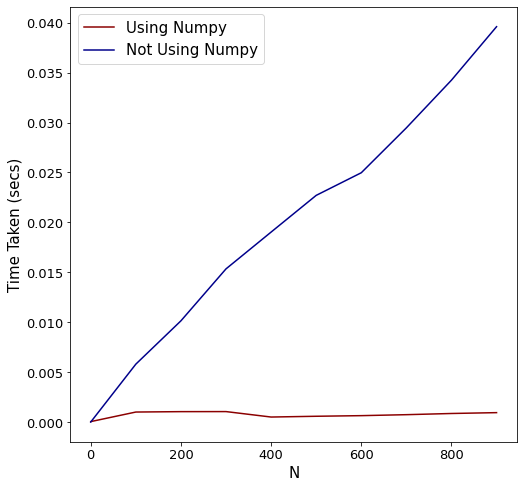

In [135]:
import matplotlib.pyplot as plt
def performancechart():
    #n = numpy based and m = manual
    n1=[]
    m1=[]
    n2=[]
    m2=[]
    for i in range(0,1000,100):
        nstart=time.time()
        Dialer_Problem(5,i)
        nend=time.time()
        n1.append(i)
        n2.append(nend - nstart)
        mstart=time.time()
        Dialer_Problem_no_numpy(5,i)
        mend=time.time()
        m1.append(i)
        m2.append(mend - mstart)
    return (n1,n2, m1, m2)    

print("n1",n1)
print("n2",n2)
(n1,n2,m1,m2) = performancechart()

N=range(0,1000,100)
plt.figure(figsize=(8,8))
plt.plot(N,n2,c='darkred',label="Using Numpy")
plt.plot(N,m2,c='darkblue',label="Not Using Numpy")
plt.xlabel('N', fontsize=15)
plt.ylabel('Time Taken (secs)', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)  
plt.show()

## part g) Extrapolation for N = 10 ** 7 could take 500 secs

Without using Numpy we have an linear increase. Which means, as N grows, proportionally time taken goes up. 
With this calculation, to dial a 10 ** 7 digit, we would take  500 secs


## part h & i) Rebuilding using Algorithm that leverages binary instead of decimal number


In [6]:
def matmul(A,B):
    """
    A function which computes matrix multiplication of the first 
    and second inputs. Inputs should be list-like.
    """
    
    if len(A[0])==len(B):
        R=[[sum(x*y for x,y in zip(A_row,B_col)) for B_col in zip(*B)] for A_row in A]
        return R
    else: 
        print('Matrix dimensions do not match')
        
        
def decimalToBin(number):
    if number == 0:
        return '0'
    else:
        binary=str(number%2)
        return (str(decimalToBin(number//2)) + binary) 

        

def Dialer_Problem_with_binary(s,n):
    """
    A function to find number of unique n-digit paths on the dial pad for a given number S
    """
    dial_routes = [
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 0, 1, 0, 0, 0, 1, 0],
    [1, 0, 0, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0, 1, 0]]
    #Each point can is a digit in itself so if we have to dial 1 digit number, for all numbers 1 path exists
    initial_number=[
    [1],
    [1],
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1], 
    [1]]
    
    #Lets compute the binary value for n provided
    bin_n= decimalToBin(n)
    ind=len(bin_n)
    paths=dial_routes

    for i in range(0,ind):
            if(i==0):
                paths=matmul(dial_routes,paths)
            else:
                paths=matmul(paths,paths)
    paths = matmul(dial_routes,initial_number)
    res = paths[s][0]
    return(res)

In [ ]:
#Testing binary implementation
print(len(decimalToBin(3)))

import time
start_time = time.time()
routes = Dialer_Problem_with_binary(5,10)
end_time = time.time()
print (routes)
print("--- %s seconds ---" % (end_time - start_time))

# Problem 2 - Dimensionality Reduction

### 2a) Covariance Matrix for D

No handles with labels found to put in legend.


dt[0] [ 1.72 -0.58  1.99  1.6   2.72  2.83  5.95  4.75  5.57  9.82]
dt[1] [0.1  0.31 1.54 4.97 2.43 3.59 7.71 7.63 5.6  7.91]


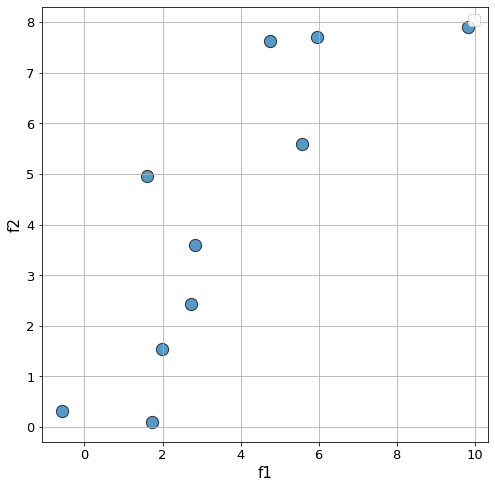

In [163]:
import numpy as np
D = np.array([[1.72,0.10],[-0.58,0.31],[1.99,1.54],
              [1.60,4.97],[2.72,2.43],[2.83,3.59],
              [5.95,7.71],[4.75,7.63],[5.57,5.60],
              [9.82,7.91]])

#Transposing to align features.
dt = D.T
print("dt[0]",dt[0])
print("dt[1]",dt[1])
x=np.linspace(-1,1,10)
plt.figure(figsize=(8,8))
plt.scatter(dt[0],dt[1],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.xlabel('f1', fontsize=15)
plt.ylabel('f2', fontsize=15)
plt.legend(fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)  
plt.show()


### 2b) Finding Eigen Vector and Eigen Values

In [164]:
from numpy import linalg as LA
covd = np.cov(dt)
covd.shape

#Here w is the eigen value and v is an array of eigen vectors
w, v = LA.eig(covd)
print(len(v), v.shape)


2 (2, 2)


### 2c) Dot product of matrix and Eigen vector to perform PCA

[-0.71905385  0.69495436]
[-0.69495436 -0.71905385]


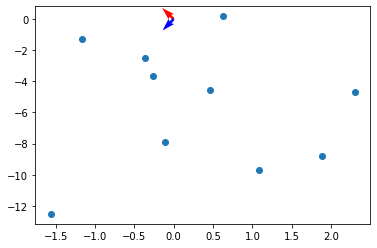

In [165]:
import matplotlib.pyplot as plt

pcaD = np.dot(D,v)
origin = [0, 0]
eig_vec1 = v[:,0]
eig_vec2 = v[:,1]

print(eig_vec1)
print(eig_vec2)


# This line below plots the 2d points
plt.scatter(pcaD[:,0], pcaD[:,1])

plt.quiver(*origin, *eig_vec1, color=['r'], scale=21)
plt.quiver(*origin, *eig_vec2, color=['b'], scale=21)
plt.show()


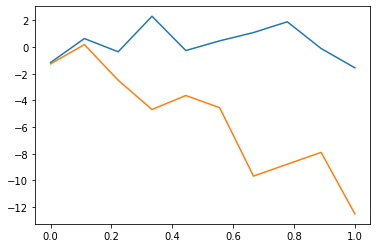

In [153]:
x=np.linspace(0,1,10)
plt.plot(x,pcaD)
plt.show()

## Attempting the same with sklearn

In [166]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df=pd.DataFrame(data=D[0:,0:], columns=["x","y"])
print(df)

      x     y
0  1.72  0.10
1 -0.58  0.31
2  1.99  1.54
3  1.60  4.97
4  2.72  2.43
5  2.83  3.59
6  5.95  7.71
7  4.75  7.63
8  5.57  5.60
9  9.82  7.91


In [ ]:
#A principal component is the one with maximum variance. To find that, we need to find the mean 
#for each feature and compute the standard variance. That is accomplished by sklearn's preprocessing

scaleD = preprocessing.scale(D.T)
pca=PCA()
pca.fit(scaleD)
pca_data=pca.transform(scaleD)